## 1. Introduction

With the rise of machine learning, algorithms and models that use this technology have spread wildly due to the numerous applications these can have. In this notebook, we will see how one can apply said algorithms when it comes to the prices of various men's shoes.


<img src="men_shoe.jpg" style="width: 300px;" />


What trend is there between each brand and the range of possible prices? Is there anything that can tell us whether a product has left a customer satisfied with a specific type of shoe? Can we perform an estimate of how much a shoe will cost given its features? These are the type of questions we can answer through different models of machine learning, whether it is by regression or by classification.

We will use the <a src="https://www.kaggle.com/sureshmecad/mens-shoe-prices">Men's Shoe Prices</a> database in order to perform our analysis, with over 10,000+ entries on the specific topic we are looking to investigate in, and 48 features to analyze for each and every product.

1. We will go through our data and remove the redundant or invalid data, along with processing the information given to us.
2. After that, we'll analyze the data to find patterns for our models.
3. We will create our model, depending on what our analysis provides us with.
4. Finally, we'll see the metrics of our model to form a conclusion.

## 2. Dependences

The dependences we will use for this project are the following:

- **Pandas** to keep the dataset.
- **Numpy** for numerical operations with arrays.
- **Matplotlib** and **seaborn** to visualize data.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
import sklearn.tree as tree

## 3. Exploring the database

The first thing we'll do is analyze the database, attribute by attribute, to see which ones could be relevant for us. As we do this, we'll get rid of columns that don't seem to be useful to us or rows with unnatural values. Unfortunately, the Men's Shoe Prices database seems to need a lot of manual cleaning, as we'll soon see when we delve deeper into the data.

Now, we'll load the database into Python.

In [2]:
# Loading the database into Python.
df = pd.read_csv("../data/train.csv", low_memory=False)

# Show general information about the database.
pd.set_option("display.max_columns", None)
print("Total entries: ", df.shape[0], "; total features: ", df.shape[1])
df.head(5)

Total entries:  19387 ; total features:  48


,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,true,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,NaN,NaN,new,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,false,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:5

From the very start, we can already see some attributes we'll either need to discard or modify. The 'id' column in the dataset, along with other unique variables, does not actually provide us with any sort information (it's simply a unique value for every shoe, which isn't useful for classification nor regression considering we'll need to add completely different values to the dataset in the future). There's also columns which contain URLs, which do not help us either for the same reason.

Something that also becomes apparent is the great amount of NaN values we can see in some of these columns. We'll check how many of these there are, now.

In [3]:
nulls = df.isnull().sum()
nulls[nulls > 0]

asins                  16816
brand                    258
colors                  8339
count                  19387
descriptions            9483
dimension              16396
ean                     9388
features                5390
flavors                19387
imageurls               1045
isbn                   19387
manufacturer           12688
manufacturernumber      4240
merchants               5347
prices_amountmin          10
prices_availability    19190
prices_color           18629
prices_condition        6766
prices_count           19316
prices_currency           76
prices_dateadded          15
prices_dateseen           25
prices_flavor          19311
prices_issale             66
prices_merchant         5544
prices_offer           13296
prices_returnpolicy    18369
prices_shipping        13634
prices_size            18726
prices_source          19371
prices_sourceurls        106
prices_warranty        19279
quantities             19376
reviews                17723
sizes         

Some of these columns are almost completely filled by NaN values or, in some cases, contain no values at all. We can safely remove the columns which contain a large amount of these, except for a few can reinterpret in order to acquire more information:

- *asins* refers to the Amazon identifier of a product, which means products with a NaN value are not on Amazon. We can turn this variable, then, into a **bool** that describes whether the product is or isn't on Amazon.
- *reviews* refers to whether the product has a review or not, and contains the information. We can turn this into another **boolean** variable that defines whether the product has a review or not.

Other than these two variables, we can get rid of any column with more than 50% of NaN values, because they could mess with our data, along with some other redundant columns that wouldn't help us with our models (such as unique variables; data that provides us with the same information, like *dateadded* and *prices_dateadded*).

In [4]:
df.drop(["id", "count", "dimension", "ean", "flavors", "imageurls", "isbn", "manufacturer",
         "prices_availability", "prices_color", "prices_count", "prices_flavor",
         "prices_merchant", "prices_offer", "prices_returnpolicy", "prices_size", "prices_shipping",
         "prices_source", "prices_sourceurls", "prices_warranty", "quantities", "skus", "sourceurls",
         "upc", "vin", "websiteids", "weight", "keys", "prices_dateadded",
         "prices_dateseen", "sizes", "name"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19387 entries, 0 to 19386
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   asins               2571 non-null   object
 1   brand               19129 non-null  object
 2   categories          19387 non-null  object
 3   colors              11048 non-null  object
 4   dateadded           19387 non-null  object
 5   dateupdated         19387 non-null  object
 6   descriptions        9904 non-null   object
 7   features            13997 non-null  object
 8   manufacturernumber  15147 non-null  object
 9   merchants           14040 non-null  object
 10  prices_amountmin    19377 non-null  object
 11  prices_amountmax    19387 non-null  object
 12  prices_condition    12621 non-null  object
 13  prices_currency     19311 non-null  object
 14  prices_issale       19321 non-null  object
 15  reviews             1664 non-null   object
dtypes: object(16)
memory u

We have now gotten rid of columns that either didn't give us information or had too many null values to properly use them. With these, we can clear our data even further by looking at each feature much more closely. After all, some of this data is still too complex to use or has to be modified to be properly used. Skipping over *asins* and *reviews*, as I've already explained what we can do to make them fit our data, we'll proceed to see what the range of information is for the other data:

In [5]:
df = df[df["brand"].notnull()]
df["brand"] = df["brand"].apply(lambda x: x.lower())

print("Number of brands: ", len(df["brand"].unique()), "; ex. ", df["brand"].unique())
df["brand"].value_counts()[df["brand"].value_counts() < 10]

Number of brands:  1822 ; ex.  ['josmo' 'servus by honeywell' 'native' ... 'head' 'swix' 'xray, xray']


bacco bucci        9
voodoo tactical    9
bostonian          9
paccilo            9
pajar              9
                  ..
mg:dakota          1
jed north          1
american eagle     1
c1rca              1
xray, xray         1
Name: brand, Length: 1472, dtype: int64

As we can see, there are a 1822 brands in total, which is a lot; however, most of these brands don't have a lot of products. Because of that, it'd be a good choice, perhaps, to leave out the rows of the most unpopular brands because they are simply outliers. For now, however, we will leave them as is. I've also made all brands lowercase just in case it detected two products of the same brand as different ones because of capitalization.

In [6]:
categories = []
for c in df["categories"]:
    for w in c.split(","):
        if w not in categories:
            categories.append(w)

print(categories)

shoesinDF = ["shoe" in c.lower() for c in df["categories"]]
count = 0
for res in shoesinDF:
    if res == True:
        count += 1
        
print("")
print("Ratio of non-shoe items: ", str(count/len(shoesinDF)))

['Clothing', 'Shoes', "Men's Shoes", "All Men's Shoes", "Men's Casual Shoes", ' Shoes', ' Accessories', 'Bags', ' Briefcases', "Men's Accessories", "Men's Halloween Costumes", 'Adult Halloween Costumes', ' Shoes & Accessories', 'Halloween', 'Men', 'Costumes', ' Reenactment', ' Theater', 'All Costumes', 'Party & Occasions', "Men's Clothing", 'Underwear', 'Shorts', 'Sporting Goods', 'Boxing', ' Martial Arts & MMA', "Men's Sunglasses", "All Men's Clothing", "Men's Outerwear", ' Shoes & Jewelry', 'Team Sports', 'Basketball', 'Backpacks', ' Bags & Briefcases', "Men's Boots", 'Oxfords & Derby Shoes', 'Wingtip', 'Jewellery', 'Cufflinks & Shirt Accessories', 'Tie Clips', 'Jewelry', 'Religious', 'Tie Pins & Clips', 'Ties & Cummerbunds', 'Accessories', 'Bags & Accessories', 'Soccer', 'Shoes & Cleats', 'Athletic', "Men's Running Shoes", 'Running Shoes', 'Running Gear', 'Fitness & Exercise Equipment', 'Athletic & Running Shoes', 'Luggage & Bags', 'Juniors Messenger Bags & Backpacks', 'Home', 'Back

There is a lot of products in this database that are not actually shoes, but all of them are *tagged* as being shoes in their category; therefore, the only way to clean this would be to clean the database manually, checking product by product whether it actually is a shoe or not. Because of this, we'll have to simply assume that all products are shoes for now and continue, accepting there will be a degree of error in our answer. However, seeing how innacurate this column is, it'd be best to drop it.

In [7]:
def colors_tf(x):
    if x is np.nan:
        return 0
    return len(x.split(","))

df["colors"] = df["colors"].apply(colors_tf)

We can change the colors column to "how many colors of the product" is offered, by changing the "NaN" value to 0 extra colors.

In [8]:
print("Ratio of dateadded vs dateupdated: ", sum(df["dateadded"] == df["dateupdated"])/df.shape[0])

df["datechanged"] = df["dateadded"] != df["dateupdated"]
df["datechanged"]

Ratio of dateadded vs dateupdated:  0.4817815881645669


0        False
1        False
2         True
3         True
4         True
         ...  
19382    False
19383    False
19384     True
19385     True
19386     True
Name: datechanged, Length: 19129, dtype: bool

Because the ratio between dates that have been changed or not is so different (50%, approximately), we will create a boolean variable that stores whether or not the product has been updated or not. It'd make sense that a popular product would be updated more. After that, we can drop the two date variables.

In [9]:
df.drop(["dateadded", "dateupdated", "features", "prices_condition", "merchants", "categories"], axis=1, inplace=True)
df["descriptions"] = pd.notnull(df["descriptions"])
df["reviews"] = pd.notnull(df["reviews"])

df["descriptions"]

0         True
1         True
2         True
3         True
4         True
         ...  
19382    False
19383     True
19384    False
19385    False
19386    False
Name: descriptions, Length: 19129, dtype: bool

Descriptions will now, instead, work as a **boolean** value that defines whether that product has a description or not. We also do the same for reviews. This helps us remove the null values while also adding a bit of information that we can later use for our model.

As for *features*, the variable does not give us the information we want. Because of how this variable works, we can see that each product can have completely different sets of features, which makes it harder to compare them. The same happens with variables like *prices_condition* or *merchants*, which have too many possible values to comprehensively compare them (just as was the case with the cateogories).

Manufacturer number does not need to be changed, as it simply describes which manufacturer provided the product, and might help with finding patterns with ranges of prices.

In [10]:
# Remove rows with NaN issale, prices_amountmin:
for c in ["prices_issale", "prices_amountmin"]:
    df = df[df[c].notnull()]

# After removing null values, transform prices_amount to numeric:
df["prices_amountmin"] = pd.to_numeric(df["prices_amountmin"], errors="coerce", downcast="float")
df["prices_amountmax"] = pd.to_numeric(df["prices_amountmax"], errors="coerce", downcast="float")

df["price"] = (df["prices_amountmin"] + df["prices_amountmax"])/2
df.drop(["prices_amountmin", "prices_amountmax"], axis=1, inplace=True)

# Analyze the range of prices to get rid of outliers:
print("Lowest price: ", df["price"].min())
print("Biggest price: ", df["price"].max())

# A price of 0.0 doesn't make sense, we can get rid of those entries:
df = df[df["price"] > 0.0]

Lowest price:  0.0
Biggest price:  16949.0


In [11]:
df = df[df["prices_currency"] == "USD"]

def asins_tf(x):
    if x is np.nan:
        return False
    return True

def manu_tf(x):
    if x is np.nan:
        return "No Manufacturer"
    return x

df["amazon"] = df["asins"].apply(asins_tf)
df.drop(["asins"], axis=1, inplace=True)
df["manufacturernumber"] = df["manufacturernumber"].apply(manu_tf)

With this, we're finished processing our database. We have combined the minimum amount and the maximum amount of each price into an average and removed the rows in which those columns had a NaN value (as we have done with *prices_issale* to have cleaner information of which products are on sale). Finally, because almost all the prices were in USD, we have removed all the entries that weren't in USD currency (as some of the entries on the dataset, in this column, were not valid to begin with).

After this, we can check our cleaned dataset.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18504 entries, 0 to 19386
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               18504 non-null  object 
 1   colors              18504 non-null  int64  
 2   descriptions        18504 non-null  bool   
 3   manufacturernumber  18504 non-null  object 
 4   prices_currency     18504 non-null  object 
 5   prices_issale       18504 non-null  object 
 6   reviews             18504 non-null  bool   
 7   datechanged         18504 non-null  bool   
 8   price               18504 non-null  float32
 9   amazon              18504 non-null  bool   
dtypes: bool(4), float32(1), int64(1), object(4)
memory usage: 1011.9+ KB


## 4. Data analysis

Now that we have cleaned up our dataset, getting rid of all the unwanted information and made sure that the one we currently have is clean, we can proceed to analyze the data by finding correlations and deciding which of the attributes we currently have will be the objective (along with what sort of model we want to develop).

When we look at our dataset, it's easy to notice that most of our data is categoric: there are a lot of booleans we can work with, along with other features with a limited number of values when it comes to their domain. Because of this, it'd be a good idea to create a **classifier** that works through a **Decision Tree**. One attribute we can use for our target, which would prove very interesting, would be the *review*. This would allow us to create a classifier that attempts to predict if a product is likely or not to receive a review based on the features above.

First of all, we can create a correlation chart between the numerical and boolean variables we have.

In [13]:
# Transforming our prices_issale to boolean, instead of "string":
def sale_tf(x):
    if x == "true":
        return True
    return False

df["prices_issale"] = df["prices_issale"].apply(sale_tf)

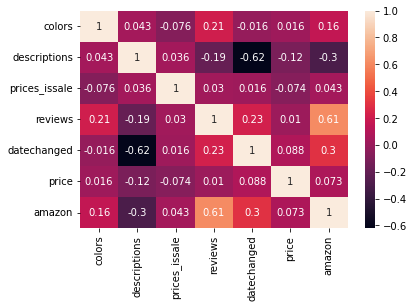

In [14]:
# Creating a correlation chart
corr = df[["colors", "descriptions", "prices_issale", "reviews", "datechanged", "price", "amazon"]].corr()
sns.heatmap(corr, annot=True)
plt.show()

We can see there is not a lot of correlation between most attributes. However, there are a few notable exceptions above the 50% correlation range.

- *reviews* and *amazon* seem to have a degree of correlation, which tells us that a lot of the reviews are probably Amazon reviews.
- *descriptions* and *datechanged* seem to have a degree of correlation, as well.

There's also a bit of correlation, although much smaller, in other variables: between *datechanged* and *amazon* (30%); between *amazon* and *descriptions* (-30%); *reviews* and *datechanged* (23%) and *reviews* and *colors* (21%). These correlations, however, are small and might not necessarily imply a lot of information. By transforming *brand* and *manufacturernumber* into numerical variables, factorizing them with Pandas, we can also get the correlation between these and each other variable.

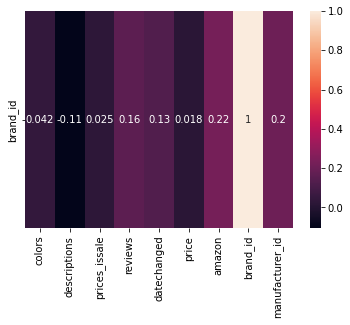

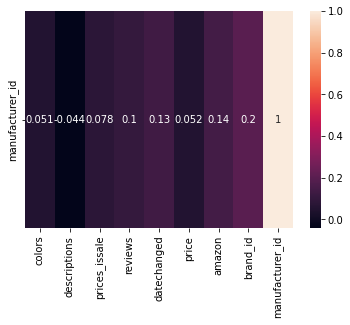

In [15]:
# Filtering the dataset to only get products on Amazon:
df["brand_id"] = pd.factorize(df["brand"])[0] + 1
df["manufacturer_id"] = pd.factorize(df["manufacturernumber"])[0] + 1

brand_corr = df.corr()["brand_id"].to_frame().T
manuf_corr = df.corr()["manufacturer_id"].to_frame().T
sns.heatmap(brand_corr, annot=True)
plt.show()
sns.heatmap(manuf_corr, annot=True)
plt.show()

As we can see, there is not a lot of correlation between these two variables and the rest, either. This means that, while there might be individual trends for each brand or manufacturer (for example, a certain brand might have a certain range of prices with its product), these might not necessarily be conclusive enough to perform regression or to imply a correlation between the price and the brand.

We can try filtering our database to only contain popular brands (for example, the ones with 40 or more products), and see if our correlation becomes better.

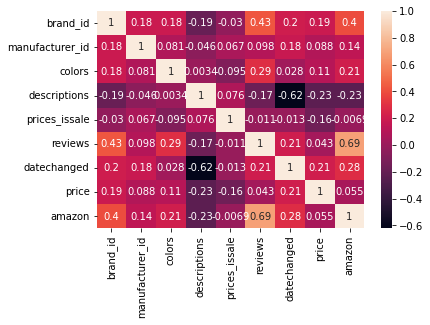

In [16]:
# Create a filtered dataset with only brands with > 40 products:
df_filter = df[df["brand"].isin(df["brand"].value_counts()[df["brand"].value_counts() > 40].index)]
corr = df_filter[["brand_id", "manufacturer_id", "colors", "descriptions", "prices_issale", "reviews", "datechanged", "price", "amazon"]].corr()
sns.heatmap(corr, annot=True)
plt.show()

As we can see, the correlations haven't changed much from the original one; some seem to have gone up in correlation, while others have gone down in it. The interesting part, however, is the fact that now there is a lot more correlation between *brand_id* and *reviews/amazon*, which could be useful information. We'll use both datasets to see which one we can build a more accurate model with.

On the one hand, relying on *brand_id* gives us more confidence when it comes to learning whether or not a known brand will get reviews or not. However, this will be much more difficult when it comes to unknown brands. In fact, this may be the exact reason why this difference between the two datasets happen:

- **Known brands** are more likely to have their products online and, by extension, get reviews.
- **Unknown brands** (like local shops, or fairly new ones) are much less likely to get reviews or to have their products online, most likely due to the added cost of having an online shop instead of a local and physical one.

This is a fairly reasonable conclusion we can assert from seeing how the correlation changes between these attributes upon filtering (with the other attributes, the ones that relate to the product itself, not seeing the same change these do). If we analyze the data we have by *brand*, instead of by product, we'll be able to check whether the distribution of our data is different or remains highly unchanged.

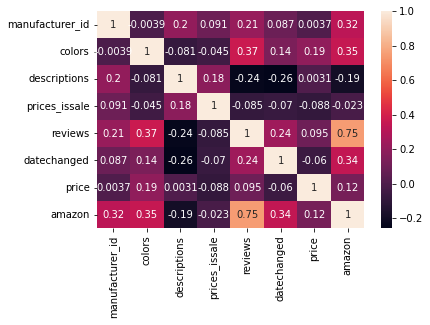

In [17]:
# Generating the data for Nike:
df_nike = df[df["brand"] == "nike"]

corr = df_nike[["manufacturer_id", "colors", "descriptions", "prices_issale", "reviews", "datechanged", "price", "amazon"]].corr()
sns.heatmap(corr, annot=True)
plt.show()

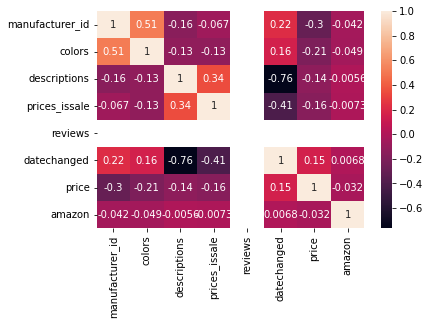

In [18]:
# Generating the data for Nike:
df_ralph = df[df["brand"] == "ralph lauren"]

corr = df_ralph[["manufacturer_id", "colors", "descriptions", "prices_issale", "reviews", "datechanged", "price", "amazon"]].corr()
sns.heatmap(corr, annot=True)
plt.show()

As we can see from these two correlation graphs, it seems as though each brand has its own trend when it comes to correlations, it doesn't seem to be universal. Because of this, perhaps making a model for every brand would give us innaccurate data, since every brand operates differently and with their own business model (comparing a local shop to a well-known established brand would be hardly fair).

I believe that, while this dataset could be very useful to see trends within an individual trend (for example, we can calculate the average price of each brand, the distribution of said price, along with other data), it falls short when it comes to providing data for proper regression or classification. This is largely in part due to the large amount of null or incorrect data we saw in the beginning in the dataset, which would require a manual rework of the dataset in order to correct it.

## 5. Model generation:

If we want to make a classifier that defines whether a product will receive a review or not, we'll first have to divide our data into two sets: one for *training* and the other one for *testing*. Not only that, but we'll have to drop the target label (reviews) from our dataset and put it in a separate variable.

We can also drop the "brand" and "manufacturernumber" variables, since we have made numerical substitutes for them.

In [19]:
# Separate the target variable from the rest of the dataset (filtered, > 40 products dataset):
y = df_filter["reviews"]
X = df_filter.drop(labels=["reviews", "brand", "manufacturernumber", "prices_currency"], axis=1)

# Split our dataset into a training set and a test set:
x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=0.8)

# Do the same but for the Nike dataset:
yn = df_nike["reviews"]
Xn = df_nike.drop(labels=["reviews", "brand", "manufacturernumber", "prices_currency"], axis=1)
xn_t, xn_v, yn_t, yn_v = train_test_split(Xn, yn, train_size=0.8)

A decision tree is a classification tool, used with discreet data, in order to reach an output. It consists of decision nodes (which correspond to the different features in a dataset, with their possible values) and leaf nodes (that contain the classification reached at the end).

We can use the DecisionTreeClassifier library, from sklearn, in order to make use of this kind of model, by testing different parameters and checking which one works best for our objective:

- How do we split every node?
- What depth should our decision tree be?
- What criterion should our decision tree follow to measure the gain of information at each split?

We will try different values for these parameters and see which one provides us with the best possible accuracy, so that we can not only create a more efficient model, but also compare it through different parameters. The sklearn library contains all the tools we need when it comes to model generation and evaluation, which will make our task a lot easier.

We will create 2 models: in the first one, we'll attempt to predict whether a product will or will not receive a review from the global dataset; however, in the second one, we'll only use the data from Nike's products (the most popular brand) to check our hypothesis that models work better when contained to a specific brand.

In [20]:
# Define the different possible parameters of the decision tree:
criterion = ["gini", "entropy"]
splitters = ["best", "random"]
max_depth = range(1, df_filter.shape[1])


# Define the Decision Tree function:
def decisionTreeShoes(crit, split, depth, xtest, xval, ytest, yval):
    tree = DecisionTreeClassifier(criterion=crit, splitter=split, max_depth=depth)
    tree = tree.fit(xtest, ytest)

    ypred = tree.predict(xval)
    accuracy = metrics.accuracy_score(yval, ypred) * 100.0
    return accuracy


# Test them all out to see what the accuracy is (global):
bestacc = 0.0
parameters = []
for c in criterion:
    for s in splitters:
        for d in max_depth:
            acc = decisionTreeShoes(c, s, d, x_t, x_v, y_t, y_v)
            if acc > bestacc:
                bestacc = acc
                parameters = [c, s, d]

print("Best parameters (Global): { ", parameters[0], ", ", parameters[1], ", ", str(parameters[2]), " }")
print("Accuracy (Global): ", bestacc)

# Test them all out to see what the accuracy is (Nike):
bestaccNike = 0.0
parametersNike = []
for c in criterion:
    for s in splitters:
        for d in max_depth:
            acc = decisionTreeShoes(c, s, d, xn_t, xn_v, yn_t, yn_v)
            if acc > bestaccNike:
                bestaccNike = acc
                parametersNike = [c, s, d]

print("Best parameters (Nike): { ", parametersNike[0], ", ", parametersNike[1], ", ", str(parametersNike[2]), " }")
print("Accuracy (Nike): ", bestaccNike)

Best parameters (Global): {  gini ,  best ,  11  }
Accuracy (Global):  98.82051282051282
Best parameters (Nike): {  gini ,  random ,  11  }
Accuracy (Nike):  98.31460674157303


As we can see, we can actually get a really good accuracy in regards to whether a product will receive a review or not, with our model. However, with this, we have really only been able to test with accuracy; since most products have *not* received a review, it is largely possible that our model has a bias. Using the best parameters, we'll check how the ROC curve of our model looks in order to get a better idea of our performance (through False Positive Rate and True Positive Rate).

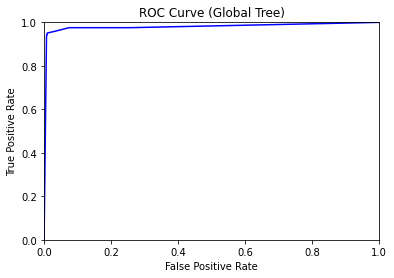

In [21]:
# Create decision trees with the best parameters found:
treeglobal = DecisionTreeClassifier(criterion=parameters[0], splitter=parameters[1], max_depth=parameters[2])
treeglobal = treeglobal.fit(x_t, y_t)
treeNike = DecisionTreeClassifier(criterion=parametersNike[0], splitter=parametersNike[1], max_depth=parametersNike[2])
treeNike = treeNike.fit(xn_t, yn_t)

# Probabilities of the predictions:
yprobs = treeglobal.predict_proba(x_v)
ynprobs = treeNike.predict_proba(xn_v)

# Building ROC curve for Global Tree:
fpr, tpr, threshold = metrics.roc_curve(y_v, yprobs[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.title("ROC Curve (Global Tree)")
plt.plot(fpr, tpr, 'b', label = "AUC = %f" % roc_auc)
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

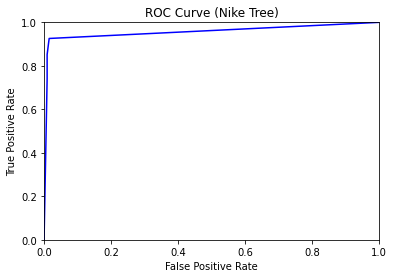

In [22]:
# Building ROC curve for Nike Tree:
fpr, tpr, threshold = metrics.roc_curve(yn_v, ynprobs[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.title("ROC Curve (Nike Tree)")
plt.plot(fpr, tpr, 'b', label = "AUC = %f" % roc_auc)
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

As we can see, our model actually does fairly well at predicting whether a product will receive a review or not based on the parameters. Using a simplified decision tree, we will be able to see which were the most important attributes.

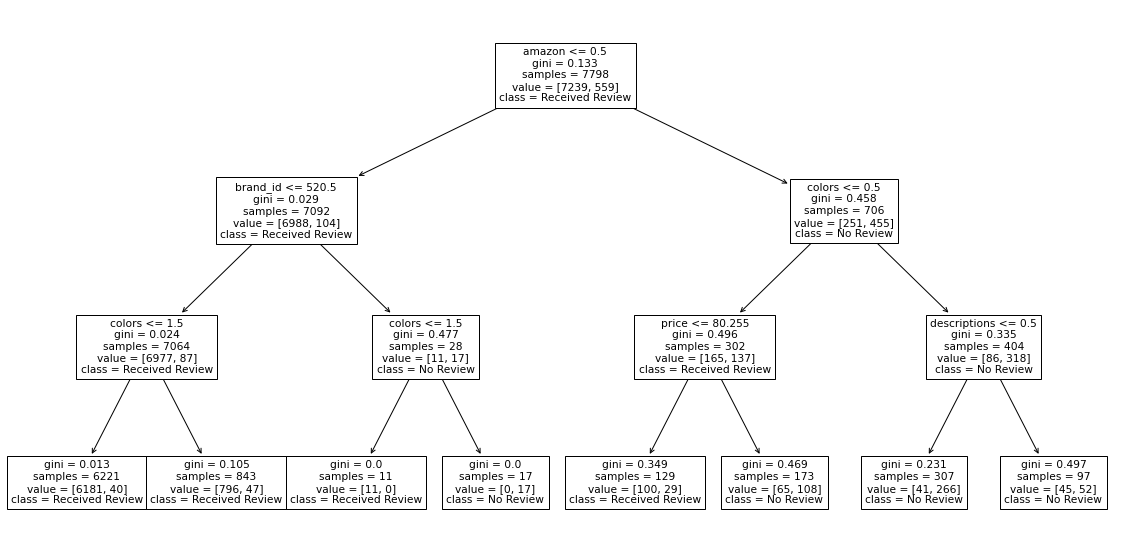

In [23]:
simplifiedtree = DecisionTreeClassifier(criterion=parameters[0], splitter=parameters[1], max_depth=3)
simplifiedtree = simplifiedtree.fit(x_t, y_t)

features = list(x_t.columns)
fig, axes = plt.subplots(figsize=(20, 10))
tree.plot_tree(simplifiedtree, feature_names=features, class_names=["Received Review", "No Review"])
plt.show()

## 6. Conclusion

We have managed to achieve several conclusions thanks to the analysis of this dataset:

- First of all, we have been able to see the importance of mantaining and curating data when it comes to analyzing it. The dataset, at first, was fairly messy; it had a lot of incomplete data or incorrect data, which made analyzing it very difficult. From the initial 48 columns, only a few were actually useful when it came to generating a model. I believe that, if the dataset were to be completed manually, it could provide us with a lot of information for future analysis.
- Secondly, we have been able to test the efficacy of a Decision Tree when it comes to classifying data when our data is discreet or categoric. Although the elements didn't seem to have a lot of correlation between them, combining them on a Decision tree helped us find out whether an item would or would not receive a review.
- The most important attribute seemed to be, just as we had guessed, *amazon*. Whether a product was or was not available in amazon proved to be very important when it came to guessing if it would have a review or not, which tells us that online commerce is the best way to get feedback from clients and, therefore, receive more attention. The *brand_id* also proved to be very important, which also proves our hypothesis that more propular brands will be the ones who receive more reviews. Surprisingly, *colors* turned out to be an important statement, which might mean that depending on how many colors for your product you offer, you might get more or less reviews (offering more options might be directly correlated with sales).

I believe this dataset turned out to be highly important to not only understanding the information it presented, but also on how to clean data and repurpose it into different attributes in order to generate more information; more information doesn't always mean better, more *curated* information is what we are looking for when it comes to analyzing data.